In [ ]:
import pandas as pd

# Replace with the actual path to your JSON file
json_file_path = 'C:\\etl_group_project\\etl_miniproject\\test.json'

# Read the JSON file into a DataFrame
df = pd.read_json(json_file_path)


# Check the structure of the DataFrame
print(df.head())

    validDate validTime  temperature
0  2023-10-10        09          6.3
1  2023-10-10        10          8.2
2  2023-10-10        11          8.8
3  2023-10-10        12          8.9
4  2023-10-10        13          8.9
5  2023-10-10        14          8.5
6  2023-10-10        15          8.3
7  2023-10-10        16          7.5
8  2023-10-10        17          7.9
9  2023-10-10        18          9.0


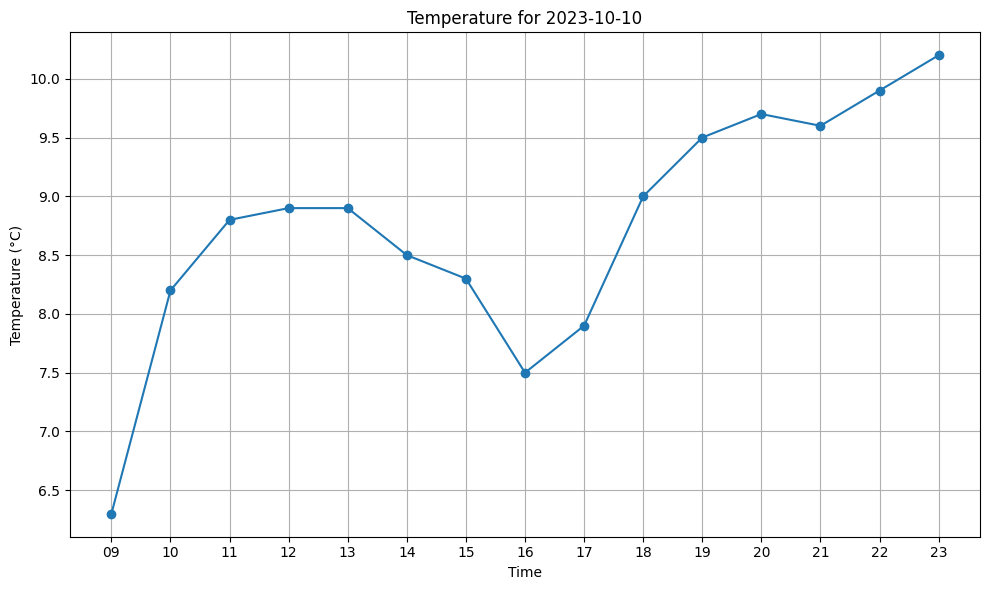

In [111]:
import pandas as pd
import json
import matplotlib.pyplot as plt


# Replace with the actual path to your JSON file
json_file_path = 'C:\\etl_group_project\\etl_miniproject\\test.json'

# Read the JSON data from the file
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Create an empty list to store the data
data = []

# Iterate through the time series data
for series in json_data[0]['timeSeries']:
    valid_time = series['validTime']
    parameters = series['parameters']
    for param in parameters:
        if param['name'] == 't':
            temperature = param['values'][0]
            date, time = valid_time.split('T')
            data.append({'validDate': date, 'validTime': time, 'temperature': temperature})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)
# Remove the "Z" from the time column
df['validTime'] = df['validTime'].str.replace('Z', '')

df['validTime'] = df['validTime'].str.replace(':00', '')
df['validTime'] = df['validTime'].str.slice(0, 5)

print(df.head(10))

# Filter the DataFrame for a specific date (e.g., '2023-10-10')
specific_date = '2023-10-10'
filtered_df = df[df['validDate'] == specific_date]

# Create a line graph for temperature
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Plot temperature data
plt.plot(filtered_df['validTime'], filtered_df['temperature'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature for {specific_date}')

# Show the graph
plt.grid(True)
plt.tight_layout()
plt.show()




In [112]:
import pandas as pd
import json

# Replace with the actual path to your JSON file
json_file_path = 'C:\\etl_group_project\\etl_miniproject\\test.json'

# Read the JSON data from the file
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Create an empty list to store the data
data = []

# Iterate through the time series data
for series in json_data[0]['timeSeries']:
    valid_time = series['validTime']
    parameters = series['parameters']
    for param in parameters:
        if param['name'] == 'ws':
            wind_speed = param['values'][0]
            date, time = valid_time.split('T')
            data.append({'validDate': date, 'validTime': time, 'wind_speed': wind_speed})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)
# # Remove the "Z" from the time column
df['validTime'] = df['validTime'].str.replace('Z', '')

# # df['validTime'] = df['validTime'].str.replace(':00', '')
df['validTime'] = df['validTime'].str.slice(0, 5)

print(df.head(10))


    validDate validTime  wind_speed
0  2023-10-10     09:00         1.9
1  2023-10-10     10:00         2.6
2  2023-10-10     11:00         3.3
3  2023-10-10     12:00         3.7
4  2023-10-10     13:00         3.5
5  2023-10-10     14:00         3.7
6  2023-10-10     15:00         2.8
7  2023-10-10     16:00         2.3
8  2023-10-10     17:00         3.3
9  2023-10-10     18:00         4.0
